In [5]:
import numpy as np
import matplotlib.pyplot as plt

def transpose(A):
    rows = len(A)
    cols = len(A[0])
    ret = np.empty(shape=[cols, rows])
    for r in range(rows):
        for c in range(cols):
            ret[c][r] = A[r][c]
    return ret

def matrixsMultiplication(A, B):
    rows = len(A)
    cols = len(B[0])
    ret = np.zeros(shape=[rows, cols])
    for r in range(rows):
        for c in range(cols):
            for k in range(len(A[0])):
                ret[r][c] = ret[r][c] + A[r][k] * B[k][c]
    return ret

def LU_decomposition(A):
    n = len(A)
    #initialize L and U
    L = np.eye(n)
    U = np.array(A, copy=True) 
    #Using Gaussion to find LU decomposition.
    for i in range(n):
        for k in range(i+1, n):
            if U[k][i] == 0:
                continue
            multiplier = U[k][i] / U[i][i]
            L[k][i] = multiplier # store multiplier.
            U[k] = U[k] - U[i] * multiplier
            U[k][i] = 0
    return [L, U]

def LU_substitution(A):
    n = len(A)
    L, U = LU_decomposition(A)
    b = np.eye(n)
    ##Ly = b substitution
    y = np.empty([n, n])
    for i in range(n):
        for j in range(n):
            y[j][i] = b[j][i]
            for k in range(j):
                y[j][i] -= y[k][i]*L[j][k]
    ##First substitution end
    
    ##Ux = y substitution
    x = np.empty([n, n])
    for i in range(n):
        for j in range(n-1, -1, -1):
            x[j][i] = y[j][i] / U[j][j]
            for k in range(j+1, n):
                x[j][i] -= x[k][i] * (U[j][k]/U[j][j])
    ##Second substitution end
    return x
    
def linearRegression(file_path, bases, lamda):
    """DATA AND MATRIXS INITIALIZE"""
    #data is a n*2 matrixs.
    data = np.loadtxt(file_path, delimiter = ', ')
    n = len(data)
    a = data[:, [0]].reshape(1*n);
    b = data[:, [1]];
    #A will be a n*bases matrix.
    A = np.empty(shape=[n, bases])
    for r in range(n):
        x = 1
        for c in range(bases):
            A[r][bases-c-1] = x
            x = x * a[r]
    #I will be an identity matrix.
    I = np.eye(bases)
    """INITIALIZE END"""
    
    """RLSE IMPLEMENTATION"""
    #Here is (AT dot A) + (lamda * I)
    ATA = matrixsMultiplication(transpose(A), A)
    inverse_target = ATA + (lamda * I)
    inversed = LU_substitution(inverse_target)
    #OK let's compute the weights
    left = matrixsMultiplication(inversed, transpose(A))
    w_rlse = matrixsMultiplication(left, b)
    rlsePrediction = matrixsMultiplication(A, w_rlse)
    """RLSE END"""
    
    """NEWTONS OPTIMIZE IMPLEMENTAION"""
    x = np.zeros(shape=[bases, 1])
    while True:
        gradiant =2*matrixsMultiplication(ATA, x) - 2*matrixsMultiplication(transpose(A), b)
        hessionFunction = 2*ATA
        x_next = x - matrixsMultiplication(LU_substitution(hessionFunction), gradiant)
        if np.sum(x_next - x) < 0.001:
            break
        else:
            x = x_next
    newtonsPrediciotn = matrixsMultiplication(A, x_next)
    """NEWTONS OPTIMIZE END"""
    
    return [a, rlsePrediction, newtonsPrediciotn,  b]

def getResult(result):
    x = result[0]
    rlsePrediction = result[1]
    newtonsPrediciotn = result[2]
    groundTruth = result[3]
    ##RLSE RESULT
    rlse = round(np.sum((groundTruth - rlsePrediction)**2), 4) ## rounding for 4 precision
    print('Least square Error of RLSE and picture:', rlse)
    plt.figure(1)
    plt.plot(x, rlsePrediction)
    plt.scatter(x, groundTruth, label='point', marker='o', color='red')
    ###NEWTON RESULT
    newton = round(np.sum((groundTruth - newtonsPrediciotn)**2), 4) ## rounding for 4 precision
    print('Least square Error of newtonMethod and picture:', newton)
    plt.figure(2)
    plt.plot(x, newtonsPrediciotn)
    plt.scatter(x, groundTruth, label='point', marker='x', color='red')
    

Least square Error of RLSE and picture: 2.3026
Least square Error of newtonMethod and picture: 0.0


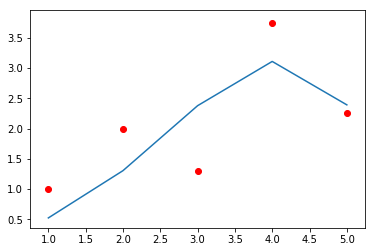

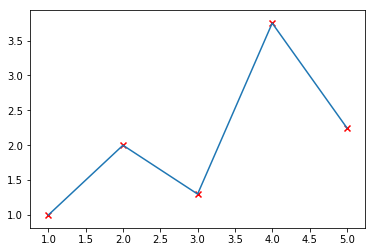

In [6]:
LSE_result = linearRegression('C:\\Users\\went1\\Desktop\\ml_practice\\data.txt', 5, 3)
getResult(LSE_result)